In [1]:
#Imported Packages:

#Generic
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Data Modeling
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Data Visualization
from scipy.stats import iqr
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv('train.csv',keep_default_na=False,na_values=[" ", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "<NA>", "N/A", "NULL", "NaN", "n/a", "nan", "null","NA"])
test_data=pd.read_csv('test.csv',keep_default_na=False,na_values=[" ", "#N/A", "#N/A N/A", "#NA", "-1.#IND", "-1.#QNAN", "-NaN", "-nan", "1.#IND", "1.#QNAN", "<NA>", "N/A", "NULL", "NaN", "n/a", "nan", "null","NA"])
default_NA={'Alley':'NA','BsmtQual':'NA','BsmtCond':'NA','BsmtExposure':'NA',
            'BsmtFinType1':'NA','BsmtFinType2':'NA','FireplaceQu':'NA',
            'GarageType':'NA','GarageFinish':'NA',
            'GarageQual':'NA','GarageCond':'NA','PoolQC':'NA','Fence':'NA','MiscFeature':'NA'}
train_data=train_data.fillna(default_NA)
test_data=test_data.fillna(default_NA)

In [3]:
nulls = train_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0]/len(train_data))
    else:
        continue

LotFrontage 0.1773972602739726
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
Electrical 0.0006849315068493151
GarageYrBlt 0.05547945205479452


In [4]:
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

MSZoning 4
LotFrontage 227
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
GarageYrBlt 78
GarageCars 1
GarageArea 1
SaleType 1


In [5]:
def remove_outliers_and_get_skewness(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier condition
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove the outliers
    filtered_data = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    # Calculate skewness
    column_skewness = skew(filtered_data[column_name], bias=False)

    return column_skewness
def count_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    print(Q1)
    print(Q3)
    IQR = Q3 - Q1

    # Define the outlier condition
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound)
    print(upper_bound)

    # Identify the outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Return the number of outliers
    return len(outliers)

In [6]:
X_train,X_valid,y_train,y_valid=train_test_split(train_data.loc[:,train_data.columns!='SalesPrice'],train_data.loc[:,train_data.columns=='SalesPrice'],test_size=0.2,random_state=42)
training = X_train.join(y_train)
validation = X_valid.join(y_valid)
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,3,2007,WD,Normal,176432
1130,1131,50,RL,65.0,7804,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,12,2009,WD,Normal,135000
1294,1295,20,RL,60.0,8172,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2006,WD,Normal,115000
860,861,50,RL,55.0,7642,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,NA,0,6,2007,WD,Normal,189950


In [7]:
training.to_csv('training.csv',index=False)
validation.to_csv('validation.csv',index=False)

In [8]:
nulls = training.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

LotFrontage 217
MasVnrType 6
MasVnrArea 6
Electrical 1
GarageYrBlt 64


In [9]:
nulls = validation.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

LotFrontage 42
MasVnrType 2
MasVnrArea 2
GarageYrBlt 17


In [10]:
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

MSZoning 4
LotFrontage 227
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
GarageYrBlt 78
GarageCars 1
GarageArea 1
SaleType 1


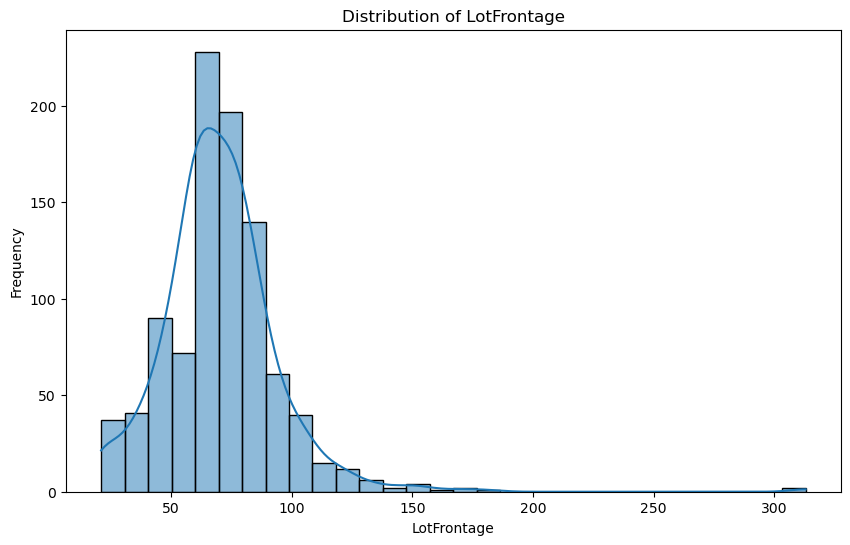

Skewness of LotFrontage before Imputing: 2.402989168767883
Skewness of LotFrontage after removing outliers: 0.0901739181888894
59.0
80.0
27.5
111.5
Number of outliers in LotFrontage: 68


In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(training['LotFrontage'], kde=True, bins=30)
plt.title(f'Distribution of LotFrontage')
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['LotFrontage'].dropna())  # dropna() to ignore missing values
print(f'Skewness of LotFrontage before Imputing: {feature_skewness}')
skewness=remove_outliers_and_get_skewness(training,'LotFrontage')
print(f'Skewness of LotFrontage after removing outliers: {skewness}')
num_outliers = count_outliers(training, 'LotFrontage')
print(f'Number of outliers in LotFrontage: {num_outliers}')

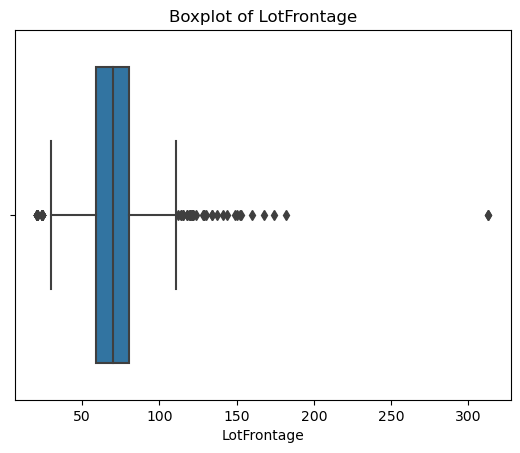

In [12]:
sns.boxplot(data=training, x='LotFrontage')

# Add labels and a title
plt.xlabel('LotFrontage')
plt.title('Boxplot of LotFrontage')

# Show the plot
plt.show()

In [13]:
training['LotFrontage_original']=training['LotFrontage']
training['MasVnrArea_original']=training['MasVnrArea']

In [14]:
from eda_imputation import fill_missing_values
training,validation,test_data=fill_missing_values(training,test_data,validation)

In [15]:
nulls = training.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if (row[0] > 0) and not (index.endswith('_original')):
        print(index, row[0])
    else:
        continue

In [16]:
nulls = validation.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

In [17]:
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

In [18]:
training.to_csv('training_filled.csv',index=False)
validation.to_csv('validation_filled.csv',index=False)
test_data.to_csv('test_filled.csv',index=False)

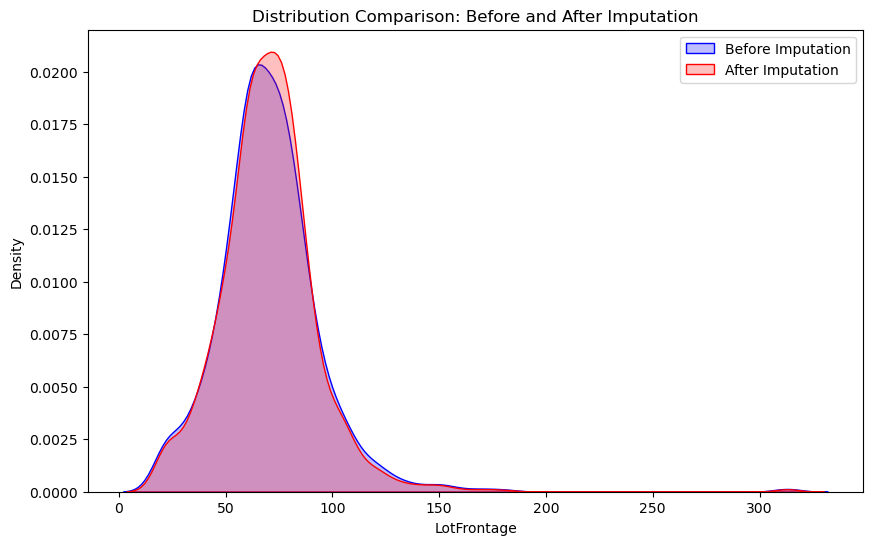

Skewness of LotFrontage after Imputing: 2.279991206464639
Skewness of LotFrontage after removing outliers: 0.014503965549060147
60.0
80.0
30.0
110.0
Number of outliers in LotFrontage: 73


In [19]:
plt.figure(figsize=(10, 6))

# Plot original data
sns.kdeplot(training['LotFrontage_original'], label='Before Imputation', color='blue', shade=True)

# Plot imputed data
sns.kdeplot(training['LotFrontage'], label='After Imputation', color='red', shade=True)

# Add labels and title
plt.title('Distribution Comparison: Before and After Imputation')
plt.xlabel('LotFrontage')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show plot
plt.show()
feature_skewness = skew(training['LotFrontage'].dropna())  # dropna() to ignore missing values
print(f'Skewness of LotFrontage after Imputing: {feature_skewness}')
skewness=remove_outliers_and_get_skewness(training,'LotFrontage')
print(f'Skewness of LotFrontage after removing outliers: {skewness}')
num_outliers = count_outliers(training, 'LotFrontage')
print(f'Number of outliers in LotFrontage: {num_outliers}')

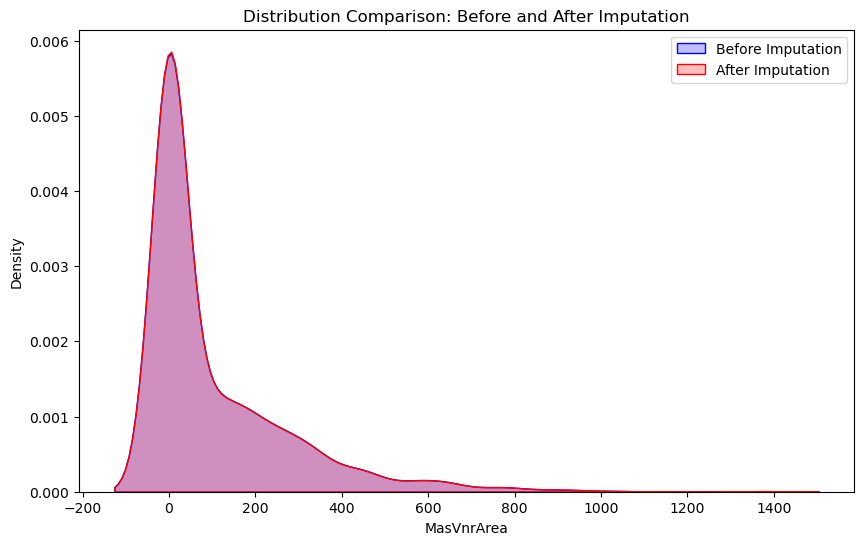

Skewness of LotFrontage after Imputing: 2.289205682330244
Skewness of LotFrontage after removing outliers: 1.4117426386197205
0.0
166.0
-249.0
415.0
Number of outliers in LotFrontage: 77


In [20]:
plt.figure(figsize=(10, 6))

# Plot original data
sns.kdeplot(training['MasVnrArea_original'], label='Before Imputation', color='blue', shade=True)

# Plot imputed data
sns.kdeplot(training['MasVnrArea'], label='After Imputation', color='red', shade=True)

# Add labels and title
plt.title('Distribution Comparison: Before and After Imputation')
plt.xlabel('MasVnrArea')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show plot
plt.show()
feature_skewness = skew(training['MasVnrArea'].dropna())  # dropna() to ignore missing values
print(f'Skewness of LotFrontage after Imputing: {feature_skewness}')
skewness=remove_outliers_and_get_skewness(training,'MasVnrArea')
print(f'Skewness of LotFrontage after removing outliers: {skewness}')
num_outliers = count_outliers(training, 'MasVnrArea')
print(f'Number of outliers in LotFrontage: {num_outliers}')

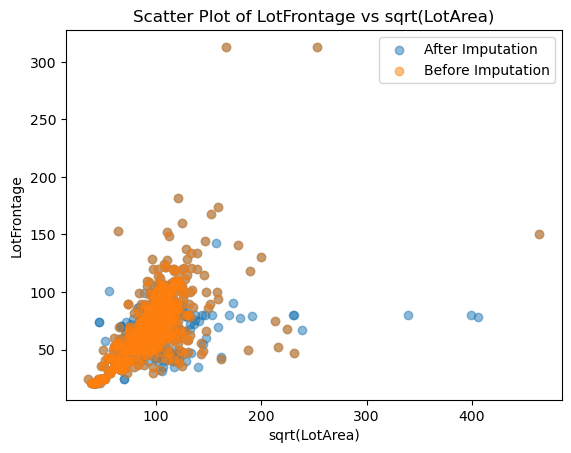

In [21]:
plt.scatter(np.sqrt(training['LotArea']), training['LotFrontage'], label='After Imputation', alpha=0.5)
plt.scatter(np.sqrt(training['LotArea']), training['LotFrontage_original'], label='Before Imputation', alpha=0.5)
plt.xlabel('sqrt(LotArea)')
plt.ylabel('LotFrontage')
plt.legend()
plt.title("Scatter Plot of LotFrontage vs sqrt(LotArea)")
plt.show()

In [22]:
training.drop(columns=[col for col in training.columns if col.endswith('_original')], inplace=True)
training

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,255,20,RL,70.0,8400,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,6,2010,WD,Normal,145000
1,1067,60,RL,59.0,7837,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,5,2009,WD,Normal,178000
2,639,30,RL,67.0,8777,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,5,2008,WD,Normal,85000
3,800,50,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,6,2007,WD,Normal,175000
4,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1096,20,RL,78.0,9317,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,3,2007,WD,Normal,176432
1164,1131,50,RL,65.0,7804,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,12,2009,WD,Normal,135000
1165,1295,20,RL,60.0,8172,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2006,WD,Normal,115000
1166,861,50,RL,55.0,7642,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,NA,0,6,2007,WD,Normal,189950


# Analysis and Transformations to the Response Variable

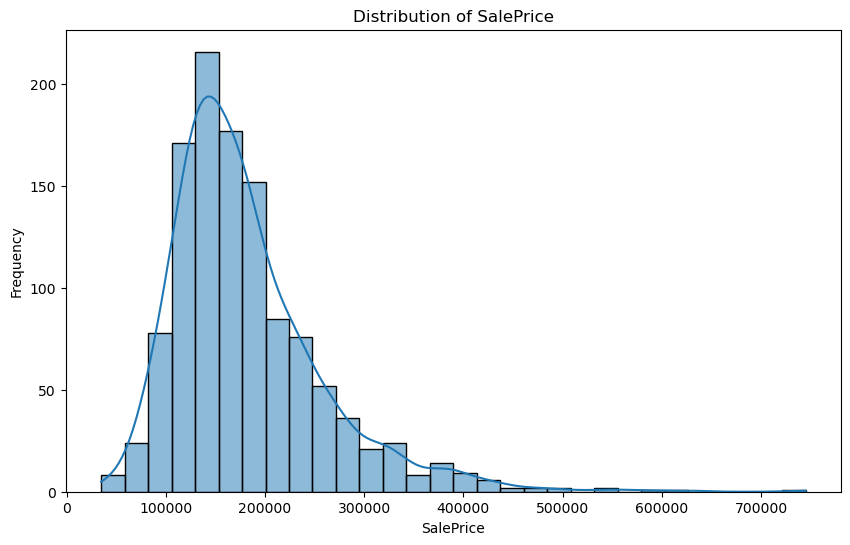

Skewness of SalePrice: 1.7408891554667465


In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(training['SalePrice'], kde=True, bins=30)
plt.title(f'Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['SalePrice'].dropna())  # dropna() to ignore missing values
print(f'Skewness of SalePrice: {feature_skewness}')

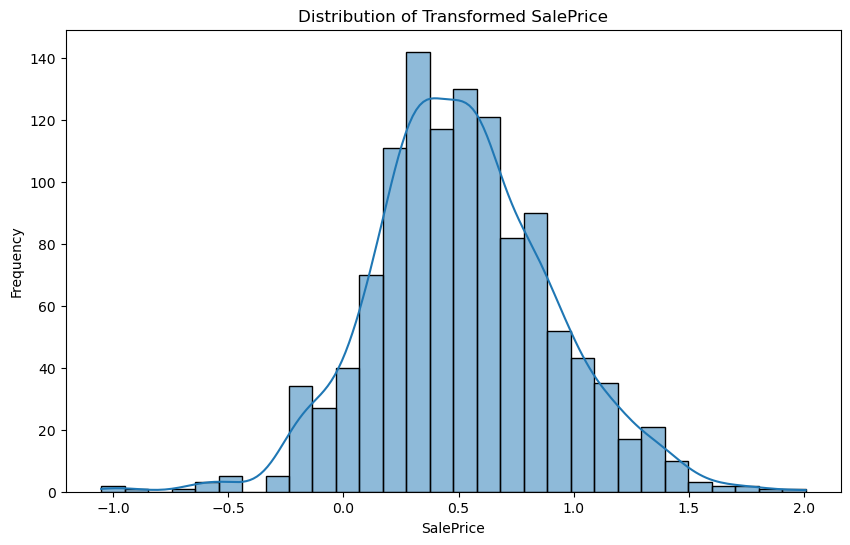

Skewness of SalePrice after transformation: 0.12471907609541613


In [25]:
training['SalePrice']=np.log(training['SalePrice']/100000)
validation['SalePrice']=np.log(validation['SalePrice']/100000)
plt.figure(figsize=(10, 6))
sns.histplot(training['SalePrice'], kde=True, bins=30)
plt.title(f'Distribution of Transformed SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['SalePrice'].dropna())  # dropna() to ignore missing values
print(f'Skewness of SalePrice after transformation: {feature_skewness}')

# Feature Engineering

### Create New Features

In [28]:
training['Total_Bathrooms'] = (training['FullBath'] + (0.5 * training['HalfBath']) +
                               training['BsmtFullBath'] + (0.5 * training['BsmtHalfBath']))
validation['Total_Bathrooms'] = (validation['FullBath'] + (0.5 * validation['HalfBath']) +
                               validation['BsmtFullBath'] + (0.5 * validation['BsmtHalfBath']))
test_data['Total_Bathrooms'] = (test_data['FullBath'] + (0.5 *test_data['HalfBath']) +
                               test_data['BsmtFullBath'] + (0.5 * test_data['BsmtHalfBath']))

In [29]:
training['HomeAgeAtSale'] = training['YrSold'] - training['YearBuilt']
validation['HomeAgeAtSale'] = validation['YrSold'] - validation['YearBuilt']
test_data['HomeAgeAtSale'] = test_data['YrSold'] - test_data['YearBuilt']

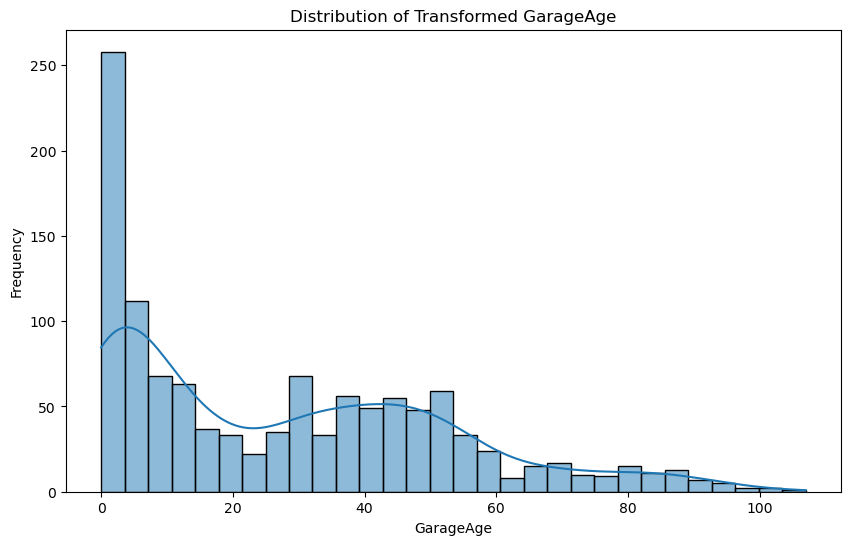

Skewness of GarageAge after transformation: 0.7107487594888813


In [30]:
training['GarageAge'] = training.apply(
    lambda row: row['YrSold'] - row['GarageYrBlt'] if row['GarageYrBlt'] != 0 else 0,
    axis=1
)
validation['GarageAge'] = validation.apply(
    lambda row: row['YrSold'] - row['GarageYrBlt'] if row['GarageYrBlt'] != 0 else 0,
    axis=1
)
test_data['GarageAge'] = test_data.apply(
    lambda row: row['YrSold'] - row['GarageYrBlt'] if row['GarageYrBlt'] != 0 else 0,
    axis=1
)
plt.figure(figsize=(10, 6))
sns.histplot(training['GarageAge'], kde=True, bins=30)
plt.title(f'Distribution of Transformed GarageAge')
plt.xlabel('GarageAge')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['GarageAge'].dropna())  # dropna() to ignore missing values
print(f'Skewness of GarageAge after transformation: {feature_skewness}')

In [31]:
training['has_garage']=np.where(training['GarageYrBlt']==0,0,1)
validation['has_garage']=np.where(validation['GarageYrBlt']==0,0,1)
test_data['has_garage']=np.where(test_data['GarageYrBlt']==0,0,1)

In [32]:
training['CenturyBuilt'] = training['YearBuilt'].apply(lambda x: 1 if x < 2000 else 0)
validation['CenturyBuilt'] = validation['YearBuilt'].apply(lambda x: 1 if x < 2000 else 0)
test_data['CenturyBuilt'] = test_data['YearBuilt'].apply(lambda x: 1 if x < 2000 else 0)

In [33]:
training['Remodeled'] = (training['YearRemodAdd'] > training['YearBuilt']).astype(int)
validation['Remodeled'] = (validation['YearRemodAdd'] > validation['YearBuilt']).astype(int)
test_data['Remodeled'] = (test_data['YearRemodAdd'] > test_data['YearBuilt']).astype(int)

In [34]:
training['remodel_time'] = training['YrSold'] - training['YearRemodAdd']
validation['remodel_time'] = validation['YrSold'] - validation['YearRemodAdd']
test_data['remodel_time'] = test_data['YrSold'] - test_data['YearRemodAdd']

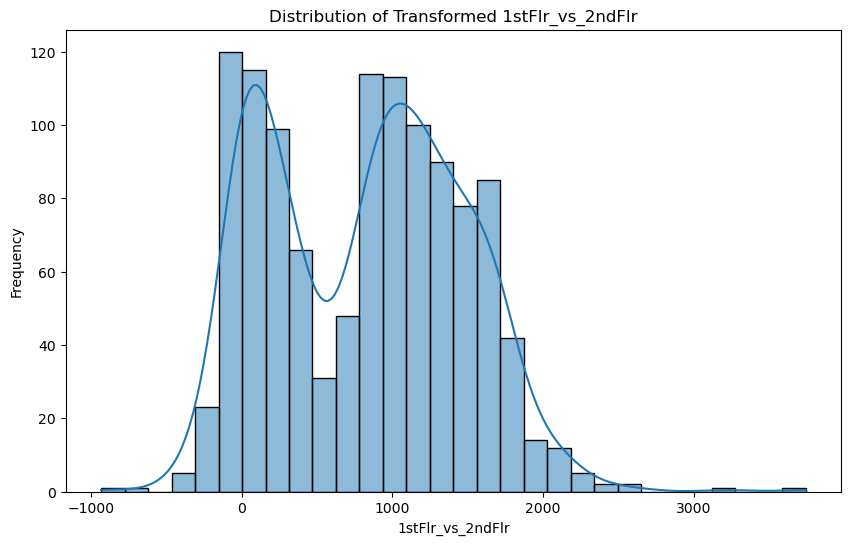

Skewness of 1stFlr_vs_2ndFlr after transformation: 0.16847856453249013


In [35]:
training['1stFlr_vs_2ndFlr'] = training['1stFlrSF'] - training['2ndFlrSF']
validation['1stFlr_vs_2ndFlr'] = validation['1stFlrSF'] - validation['2ndFlrSF']
test_data['1stFlr_vs_2ndFlr'] = test_data['1stFlrSF'] - test_data['2ndFlrSF']
plt.figure(figsize=(10, 6))
sns.histplot(training['1stFlr_vs_2ndFlr'], kde=True, bins=30)
plt.title(f'Distribution of Transformed 1stFlr_vs_2ndFlr')
plt.xlabel('1stFlr_vs_2ndFlr')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['1stFlr_vs_2ndFlr'].dropna())  # dropna() to ignore missing values
print(f'Skewness of 1stFlr_vs_2ndFlr after transformation: {feature_skewness}')

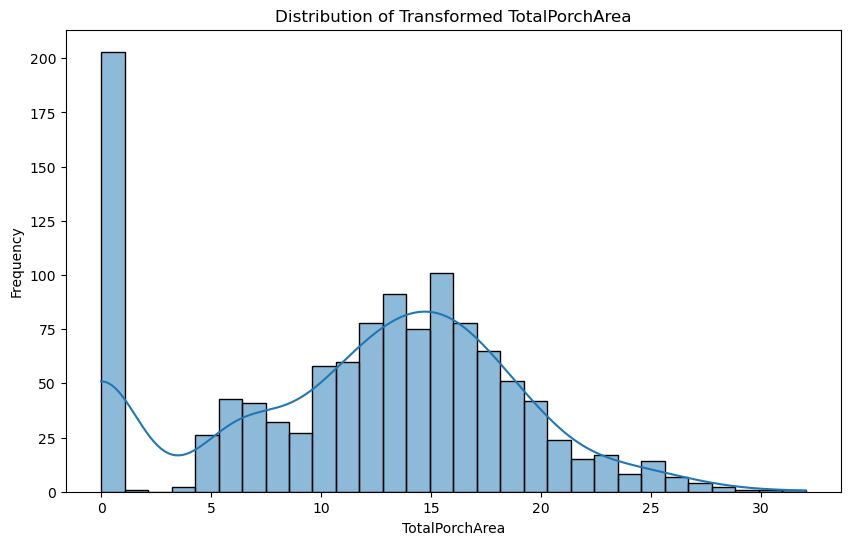

Skewness of TotalPorchArea after transformation: -0.27457879164283333


In [36]:
training['TotalPorchArea'] = training[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sum(axis=1)
validation['TotalPorchArea'] = validation[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sum(axis=1)
test_data['TotalPorchArea'] = test_data[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sum(axis=1)
training['TotalPorchArea']=np.sqrt(training['TotalPorchArea'])
validation['TotalPorchArea']=np.sqrt(validation['TotalPorchArea'])
test_data['TotalPorchArea']=np.sqrt(test_data['TotalPorchArea'])
plt.figure(figsize=(10, 6))
sns.histplot(training['TotalPorchArea'], kde=True, bins=30)
plt.title(f'Distribution of Transformed TotalPorchArea')
plt.xlabel('TotalPorchArea')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['TotalPorchArea'].dropna())  # dropna() to ignore missing values
print(f'Skewness of TotalPorchArea after transformation: {feature_skewness}')

### Reorganize Nominal Categories

In [38]:
import json
with open("nc_mapping.json", "r") as json_file:
    nc_mapping = json.load(json_file)
nc_mapping['MSSubClass'] = {int(k): v for k, v in nc_mapping['MSSubClass'].items()}
print(nc_mapping['MSSubClass'])
for key in nc_mapping:
    if key in training.columns:
        training[key] = training[key].map(nc_mapping[key]).fillna('Other')
        validation[key] = validation[key].map(nc_mapping[key]).fillna('Other')
        test_data[key] = test_data[key].map(nc_mapping[key]).fillna('Other')

{20: '1-Story', 30: '1-Story', 40: '1-Story', 45: '1-1/2 Story', 50: '1-1/2 Story', 60: '2-Story', 70: '2-Story', 75: '2-1/2 Story', 80: 'Multi-Level', 85: 'Multi-Level', 90: 'Other', 120: 'PUD', 150: 'PUD', 160: 'PUD', 180: 'Multi-Level', 190: 'Other'}


### Transform Features

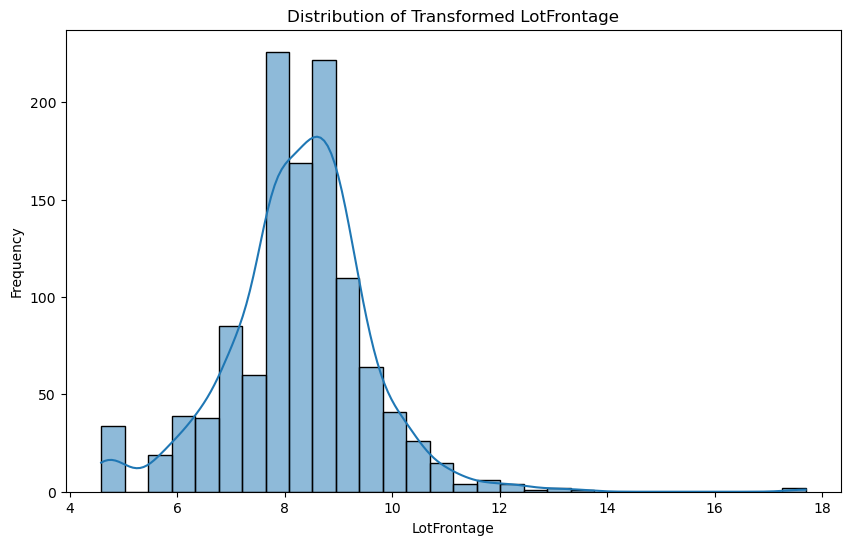

Skewness of LotFrontage after transformation: 0.395288664247026


In [40]:
training['LotFrontage']=np.sqrt(training['LotFrontage'])
validation['LotFrontage']=np.sqrt(validation['LotFrontage'])
test_data['LotFrontage']=np.sqrt(test_data['LotFrontage'])
plt.figure(figsize=(10, 6))
sns.histplot(training['LotFrontage'], kde=True, bins=30)
plt.title(f'Distribution of Transformed LotFrontage')
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['LotFrontage'].dropna())  # dropna() to ignore missing values
print(f'Skewness of LotFrontage after transformation: {feature_skewness}')

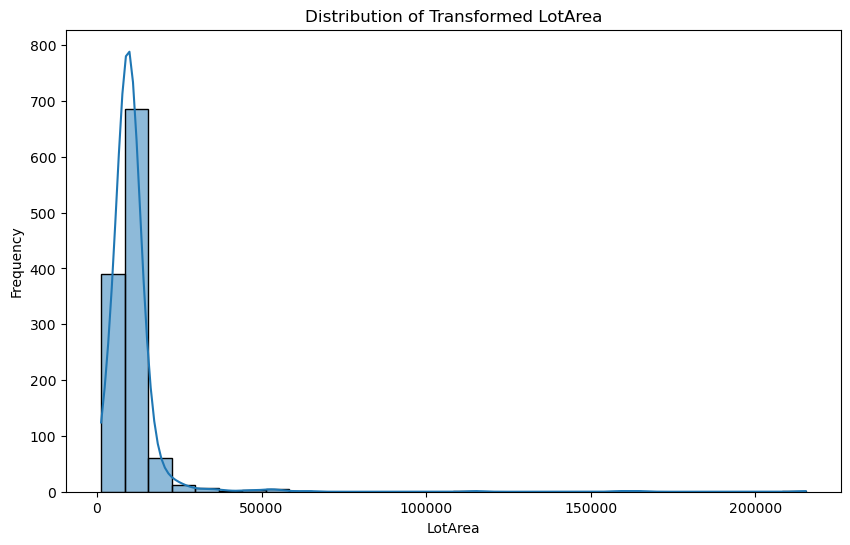

Skewness of LotArea after transformation: 11.942725558904137


In [41]:
training['LotArea']=np.log1p(training['LotArea'])
validation['LotArea']=np.log1p(validation['LotArea'])
test_data['LotArea']=np.log1p(test_data['LotArea'])
plt.figure(figsize=(10, 6))
sns.histplot(training['LotArea'], kde=True, bins=30)
plt.title(f'Distribution of Transformed LotArea')
plt.xlabel('LotArea')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['LotArea'].dropna())  # dropna() to ignore missing values
print(f'Skewness of LotArea after transformation: {feature_skewness}')

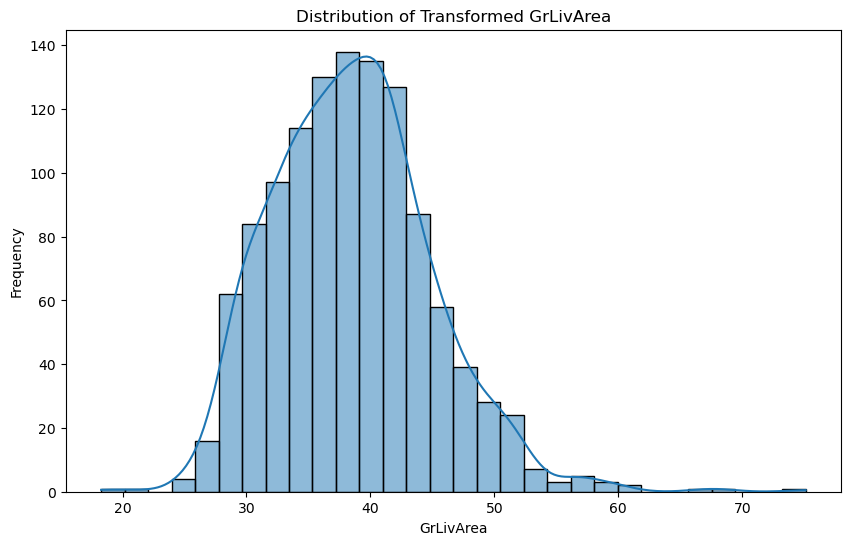

Skewness of GrLivArea after transformation: 0.6200627925636288


In [42]:
training['GrLivArea']=np.sqrt(training['GrLivArea'])
validation['GrLivArea']=np.sqrt(validation['GrLivArea'])
test_data['GrLivArea']=np.sqrt(test_data['GrLivArea'])
plt.figure(figsize=(10, 6))
sns.histplot(training['GrLivArea'], kde=True, bins=30)
plt.title(f'Distribution of Transformed GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['GrLivArea'].dropna())  # dropna() to ignore missing values
print(f'Skewness of GrLivArea after transformation: {feature_skewness}')

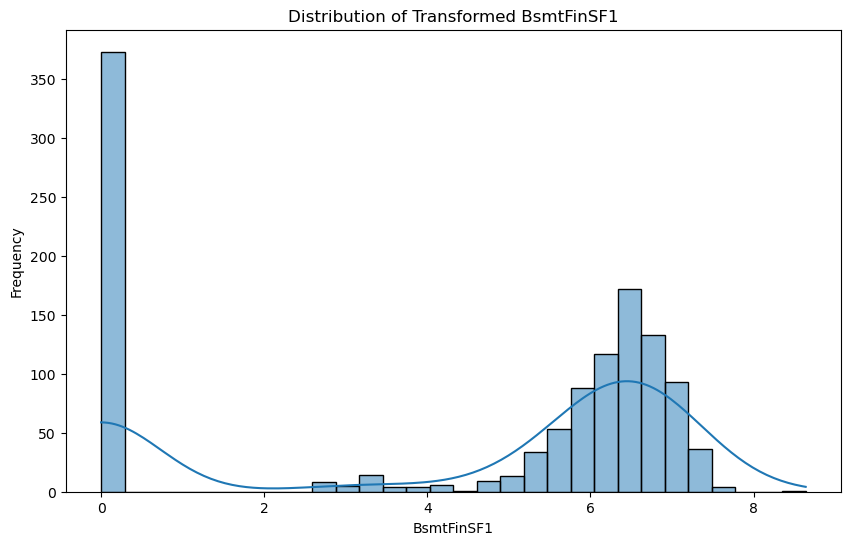

Skewness of BsmtFinSF1 after transformation: -0.6218007257101116


In [43]:
training['BsmtFinSF1']=np.log1p(training['BsmtFinSF1'])
validation['BsmtFinSF1']=np.log1p(validation['BsmtFinSF1'])
test_data['BsmtFinSF1']=np.log1p(test_data['BsmtFinSF1'])
plt.figure(figsize=(10, 6))
sns.histplot(training['BsmtFinSF1'], kde=True, bins=30)
plt.title(f'Distribution of Transformed BsmtFinSF1')
plt.xlabel('BsmtFinSF1')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness
feature_skewness = skew(training['BsmtFinSF1'].dropna())  # dropna() to ignore missing values
print(f'Skewness of BsmtFinSF1 after transformation: {feature_skewness}')

In [44]:
def reposition_target_col(df,target_col):
    temp = df.pop(target_col)
    df[target_col] = temp
    return df
training=reposition_target_col(training,'SalePrice')
validation=reposition_target_col(validation,'SalePrice')

In [45]:
training.to_csv('training_reengineered.csv')

In [46]:
from eda_best_features import get_cat_feat,select_best_continuous_features
nc=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','GarageType','MiscFeature','SaleType','SaleCondition']
nc_derived=['has_garage','CenturyBuilt','Remodeled']
nc_full=nc+nc_derived
oc=['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']
oc_derived=[]
oc_full=oc+oc_derived
num_feat=['LotFrontage','LotArea','YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageYrBlt','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
num_feat_derived=['HomeAgeAtSale','GarageAge','TotalPorchArea','Total_Bathrooms','remodel_time','1stFlr_vs_2ndFlr']
num_feat_full=num_feat+num_feat_derived
print(len(num_feat_full))
print(len(nc_full+oc_full+num_feat_full))
target=['SalePrice']
best_cat=get_cat_feat(training[nc_full+oc_full+['SalePrice']],nc_full+oc_full,'SalePrice',0.05)
best_cat

39
88


['MSSubClass',
 'MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'has_garage',
 'CenturyBuilt',
 'Remodeled',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence']

In [47]:
stat_df,best_num=select_best_continuous_features(training[num_feat_full+target],num_feat_full,'SalePrice')
best_num

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF',
 'HomeAgeAtSale',
 'GarageAge',
 'TotalPorchArea',
 'Total_Bathrooms',
 'remodel_time',
 '1stFlr_vs_2ndFlr']

In [48]:
training=training.loc[:,training.columns.isin(best_num+best_cat+['SalePrice'])]
validation=validation.loc[:,validation.columns.isin(best_num+best_cat+['SalePrice'])]
test_data=test_data.loc[:,test_data.columns.isin(best_num+best_cat)]
validation

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,Total_Bathrooms,HomeAgeAtSale,GarageAge,has_garage,CenturyBuilt,Remodeled,remodel_time,1stFlr_vs_2ndFlr,TotalPorchArea,SalePrice
0,1-Story,RL,8.366600,8414,NA,Reg,Lvl,Inside,Sawyer,Road Proximity,...,1.5,43,43.0,1,1,1,3,1068,13.856406,0.435024
1,2-Story,RL,9.899495,12256,NA,IR1,Lvl,Corner,NoRidge,Road Proximity,...,3.5,16,16.0,1,1,1,15,378,14.764823,1.178655
2,1-Story,RM,7.483315,8960,Grvl,Reg,Lvl,Inside,OldTown,Road Proximity,...,1.0,83,83.0,1,1,1,60,1028,11.401754,0.139762
3,1-1/2 Story,RM,7.071068,5000,NA,Reg,Lvl,Corner,BrkSide,Road Proximity,...,2.0,59,56.0,1,1,1,56,344,7.745967,0.463734
4,1-Story,RL,9.433981,12898,NA,IR1,HLS,Inside,Timber,Road Proximity,...,3.0,2,1.0,1,0,1,1,1620,15.099669,1.148988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1-Story,RM,7.071068,5925,NA,Reg,Bnk,Inside,OldTown,Road Proximity,...,1.0,70,12.0,1,1,1,7,1131,8.485281,-0.111256
288,1-Story,RL,11.135529,16158,NA,IR1,Low,Inside,StoneBr,Road Proximity,...,3.0,4,4.0,1,0,0,4,1530,14.282857,0.955511
289,2-Story,RL,7.937254,8199,NA,Reg,Lvl,Inside,CollgCr,Road Proximity,...,3.5,3,3.0,1,0,0,3,0,7.348469,0.636577
290,2-Story,RL,7.745967,9084,NA,Reg,Lvl,Inside,Edwards,Road Proximity,...,2.0,69,69.0,1,1,1,59,0,10.954451,0.076961


In [49]:
from eda_preprocesser import feature_encoder
mod_encoder=feature_encoder()
training=mod_encoder.fit_transform(training)
validation=mod_encoder.transform(validation)
test_data=mod_encoder.transform(test_data)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
vif_data = pd.DataFrame()
X = training.loc[:,training.columns!='SalePrice'].copy()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
vif_data.to_csv('vif.csv')
vif_data

,feature,VIF
0,2ndFlrSF,inf
1,1stFlr_vs_2ndFlr,inf
2,remodel_time,inf
3,YearRemodAdd,inf
4,YearBuilt,inf
...,...,...
158,SaleType_ConLI,1.235008
159,Neighborhood_Blueste,1.227812
160,SaleType_Con,1.219187
161,SaleType_Oth,1.188614


In [51]:
best_features=vif_data[vif_data['VIF']<10]['feature'].values
best_features

array(['BldgType_Twnhs', 'BsmtFinSF1', 'Neighborhood_NWAmes',
       'Exterior1st_Cement-based', 'RoofStyle_Gambrel',
       'Neighborhood_BrkSide', 'Neighborhood_Gilbert',
       'Neighborhood_Sawyer', 'Foundation_PConc', 'RoofMatl_Wood Roofing',
       'GarageArea', 'HouseStyle_SFoyer', 'GarageCars', 'MSZoning_RH',
       'Neighborhood_NridgHt', 'Neighborhood_Crawfor',
       'Neighborhood_IDOTRR', 'Foundation_CBlock',
       'MSSubClass_2-1/2 Story', 'BsmtFinType1', 'Exterior1st_Other',
       'Neighborhood_SawyerW', 'Exterior2nd_Shingles-based',
       'Neighborhood_Mitchel', 'FireplaceQu', 'BsmtQual', 'CenturyBuilt',
       'Fireplaces', 'SaleType_WD', 'RoofStyle_Mansard',
       'Neighborhood_NoRidge', 'TotRmsAbvGrd',
       'Exterior1st_Shingles-based', 'OverallQual', 'HouseStyle_2.5Unf',
       'Total_Bathrooms', 'GarageType_Basment', 'FullBath',
       'Neighborhood_SWISU', 'Neighborhood_Timber',
       'Neighborhood_ClearCr', 'ExterQual', 'Neighborhood_BrDale',
       'Founda

In [52]:
redundancies=['YearBuilt','YearRemodAdd','GarageYrBlt','OpenPorchSF','BsmtUnfSF','2ndFlrSF','1stFlrSF']
vif_data = pd.DataFrame()
X = training.loc[:,training.columns!='SalePrice'].copy().drop(columns=redundancies)
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
vif_data.to_csv('vif_2.csv')
vif_data

,feature,VIF
0,has_garage,3455.340448
1,GarageType_NA,172.446646
2,RoofStyle_Gable,157.069636
3,RoofStyle_Hip,146.158215
4,SaleType_New,121.969174
...,...,...
151,Neighborhood_Blueste,1.226899
152,SaleType_ConLI,1.223797
153,SaleType_Con,1.216605
154,SaleType_Oth,1.181986


In [53]:
best_features=vif_data[vif_data['VIF']<10]['feature'].values
best_features

array(['1stFlr_vs_2ndFlr', 'BldgType_Twnhs', 'BsmtFinSF1',
       'Neighborhood_NWAmes', 'Exterior1st_Cement-based',
       'RoofStyle_Gambrel', 'Neighborhood_Gilbert',
       'Neighborhood_BrkSide', 'Neighborhood_Sawyer',
       'RoofMatl_Wood Roofing', 'Foundation_PConc', 'GarageCars',
       'GarageArea', 'HouseStyle_SFoyer', 'Neighborhood_NridgHt',
       'MSZoning_RH', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR',
       'Foundation_CBlock', 'MSSubClass_2-1/2 Story', 'BsmtFinType1',
       'Exterior1st_Other', 'GarageAge', 'Exterior2nd_Shingles-based',
       'Neighborhood_SawyerW', 'Neighborhood_Mitchel', 'FireplaceQu',
       'BsmtQual', 'CenturyBuilt', 'Fireplaces', 'SaleType_WD',
       'TotRmsAbvGrd', 'RoofStyle_Mansard', 'Neighborhood_NoRidge',
       'OverallQual', 'Exterior1st_Shingles-based', 'HouseStyle_2.5Unf',
       'Total_Bathrooms', 'GarageType_Basment', 'TotalBsmtSF', 'FullBath',
       'Neighborhood_SWISU', 'Neighborhood_Timber', 'remodel_time',
       'Neighborh

In [54]:
x_train=training.loc[:,best_features]
y_train=training.loc[:,'SalePrice'].values
x_valid=validation.loc[:,best_features]
y_valid=validation.loc[:,'SalePrice'].values
x_test=test_data.loc[:,best_features]

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
mse=mean_squared_error(np.log(100000*np.exp(y_valid)), np.log(100000*np.exp(y_pred)))
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse))
print("R² Score:", r2_score(np.log(100000*np.exp(y_valid)), np.log(100000*np.exp(y_pred))))

Mean Squared Error: 0.022186617920794693
Root Mean Squared Error: 0.14895173017053107
R² Score: 0.8811092672754699


In [57]:
y_pred=model.predict(x_test)
y_pred=100000*np.exp(y_pred)
results=pd.read_csv('sample_submission.csv')
results['SalePrice']=y_pred
results.to_csv('submission_test_1.csv',index=False)

In [58]:
from sklearn.linear_model import Ridge, Lasso
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
mse=mean_squared_error(np.log(100000*np.exp(y_valid)), np.log(100000*np.exp(y_pred)))
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse))
print("R² Score:", r2_score(np.log(100000*np.exp(y_valid)), np.log(100000*np.exp(y_pred))))

Mean Squared Error: 0.021334294799097726
Root Mean Squared Error: 0.1460626399840073
R² Score: 0.8856765844221557


In [59]:
coefficients = model.coef_
features = x_train.columns
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Step 5: Show features used in the model (non-zero coefficients)
print(coef_df[coef_df['Coefficient'] != 0]['Feature'].values)

['1stFlr_vs_2ndFlr' 'BldgType_Twnhs' 'BsmtFinSF1' 'Neighborhood_NWAmes'
 'Exterior1st_Cement-based' 'RoofStyle_Gambrel' 'Neighborhood_Gilbert'
 'Neighborhood_BrkSide' 'Neighborhood_Sawyer' 'RoofMatl_Wood Roofing'
 'Foundation_PConc' 'GarageCars' 'GarageArea' 'HouseStyle_SFoyer'
 'Neighborhood_NridgHt' 'MSZoning_RH' 'Neighborhood_Crawfor'
 'Neighborhood_IDOTRR' 'Foundation_CBlock' 'MSSubClass_2-1/2 Story'
 'BsmtFinType1' 'Exterior1st_Other' 'GarageAge'
 'Exterior2nd_Shingles-based' 'Neighborhood_SawyerW'
 'Neighborhood_Mitchel' 'FireplaceQu' 'BsmtQual' 'CenturyBuilt'
 'Fireplaces' 'SaleType_WD' 'TotRmsAbvGrd' 'RoofStyle_Mansard'
 'Neighborhood_NoRidge' 'OverallQual' 'Exterior1st_Shingles-based'
 'HouseStyle_2.5Unf' 'Total_Bathrooms' 'GarageType_Basment' 'TotalBsmtSF'
 'FullBath' 'Neighborhood_SWISU' 'Neighborhood_Timber' 'remodel_time'
 'Neighborhood_ClearCr' 'ExterQual' 'Neighborhood_BrDale'
 'Foundation_Slab' 'BsmtCond' 'Neighborhood_MeadowV'
 'SaleCondition_Normal' 'KitchenQual' 'Hou

In [60]:
y_pred=model.predict(x_test)
y_pred=100000*np.exp(y_pred)
results=pd.read_csv('sample_submission.csv')
results['SalePrice']=y_pred
results.to_csv('submission_test_2.csv',index=False)

In [61]:
model = Lasso(alpha=0.001)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
mse=mean_squared_error(np.log(100000*np.exp(y_valid)), np.log(100000*np.exp(y_pred)))
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse))
print("R² Score:", r2_score(np.log(100000*np.exp(y_valid)), np.log(100000*np.exp(y_pred))))

Mean Squared Error: 0.02120355311941411
Root Mean Squared Error: 0.1456143987365745
R² Score: 0.8863771857553878


In [62]:
coefficients = model.coef_
features = x_train.columns
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Step 5: Show features used in the model (non-zero coefficients)
print(coef_df[coef_df['Coefficient'] != 0]['Feature'].values)

['1stFlr_vs_2ndFlr' 'BldgType_Twnhs' 'BsmtFinSF1'
 'Exterior1st_Cement-based' 'Neighborhood_Gilbert' 'Neighborhood_BrkSide'
 'Foundation_PConc' 'GarageCars' 'GarageArea' 'HouseStyle_SFoyer'
 'Neighborhood_NridgHt' 'Neighborhood_Crawfor' 'Neighborhood_IDOTRR'
 'Foundation_CBlock' 'BsmtFinType1' 'GarageAge' 'FireplaceQu' 'BsmtQual'
 'Fireplaces' 'SaleType_WD' 'TotRmsAbvGrd' 'Neighborhood_NoRidge'
 'OverallQual' 'Total_Bathrooms' 'TotalBsmtSF' 'remodel_time'
 'Neighborhood_ClearCr' 'ExterQual' 'Foundation_Slab' 'BsmtCond'
 'SaleCondition_Normal' 'KitchenQual' 'GarageFinish' 'LotFrontage'
 'Condition1_Road Proximity' 'Neighborhood_StoneBr' 'Alley_Pave'
 'RoofMatl_Specialty Roofing' 'CentralAir' 'HeatingQC' 'OverallCond'
 'LotConfig_CulDSac' 'LotArea' 'BsmtExposure' 'Remodeled' 'PavedDrive'
 'PoolQC' 'LotShape_Reg' 'TotalPorchArea' 'ExterCond' 'LotShape_IR3'
 'Functional' 'BsmtFinType2' 'Fence' 'LotShape_IR2']


In [63]:
y_pred=model.predict(x_test)
y_pred=100000*np.exp(y_pred)
results=pd.read_csv('sample_submission.csv')
results['SalePrice']=y_pred
results.to_csv('submission_test_3.csv',index=False)